<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 7</p></tp>
            <tp><p style="font-size:150%;text-align:center">Arquitecturas de agentes</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


## Objetivo <a class="anchor" id="inicio"></a>

En este notebook ejemplificaremos tres tipos de agente: dirigido por tabla, de respuesta simple y basado en el conocimiento. Usaremos el problema del laberinto para implementar los tres tipos de programa de agente para intentar salir del laberinto.


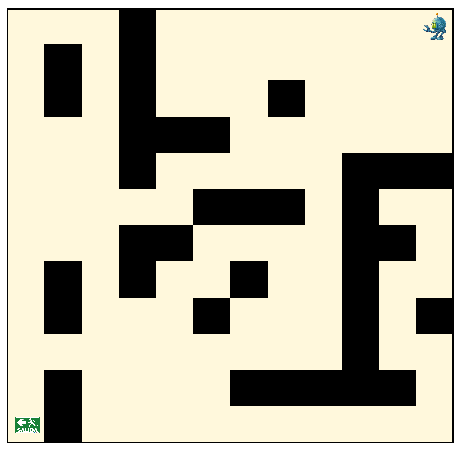

In [1]:
from agentes import Laberinto

lab = Laberinto(pos_inicial=(11,11))
lab.pintar()

## Secciones

Desarrollaremos la explicación en las siguientes secciones:

1. [El ambiente del laberinto](#lab)
2. [Un agente dirigido por tabla](#agenteTD)
3. [Un agente de reflejo simple](#agenteSR)
4. [Un agente basado en el conocimiento](#agenteKB)
5. [Creando un mapa mental](#mapa)

## El ambiente del laberinto <a class="anchor" id="lab"></a>

([Volver al inicio](#inicio))

En el problema del laberinto la percepción del agente está basada en una colección de sensores que se encienden cuando detectan un obstáculo, organizados de la siguiente manera:

`[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]`

Los valores de los sensores se obtienen mediante el método `para_sentidos()` de la clase `Laberinto` y se almacenan en el atributo `perceptos` de un objeto de clase `Agente`. Veamos la implementación de la percepción del agente directamente en el ejemplo donde el agente comienza en la casilla $(11,11)$:

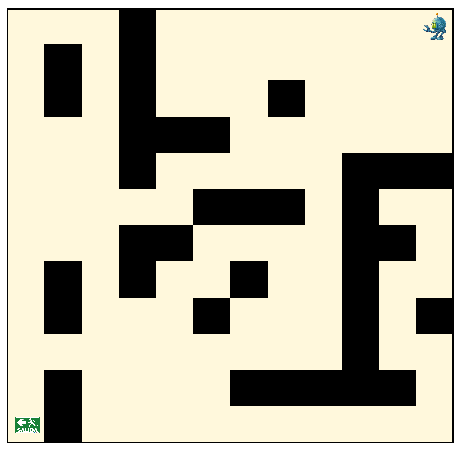

La lista de sensores es:
[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]
Los valores en la casilla (11,11) son:
[False, False, True, True]


In [2]:
from agentes import *
lab = Laberinto(pos_inicial=(11,11))
lab.pintar()
agente = Agente()
agente.perceptos = lab.para_sentidos()
print('La lista de sensores es:')
print('[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]')
print('Los valores en la casilla (11,11) son:')
print(agente.perceptos)

Las acciones posibles del agente son:

* adelante: el agente avanza una casilla.
* voltearIzquierda: el agente gira 90º en contra de las manecillas del reloj.
* voltearDerecha: el agente gira 90º a favor de las manecillas del reloj.

Cada acción del agente tiene un efecto en el entorno, implementado mediante el método `transicion()` de la clase `Laberinto`. Veamos un ejemplo en donde el agente parte de la casilla $(11,11)$ y deambula un poco por el laberinto:

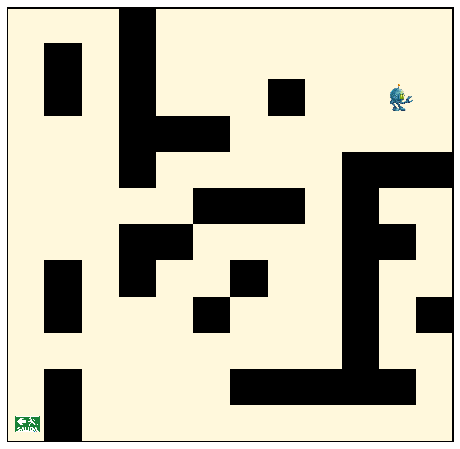

In [4]:
from agentes import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt

lab = Laberinto(pos_inicial=(11,11))
acciones = ['adelante', 'adelante', 'voltearIzquierda', 
            'adelante', 'adelante', 'voltearIzquierda', 'adelante']

lab.pintar()

for a in acciones:
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25)    

## Un agente dirigido por tabla <a class="anchor" id="agenteTD"></a>

([Volver al inicio](#inicio))

El tipo más sencillo de un programa de agente es cuando hacemos una asociación directa entre input y output, en este caso, entre percepción y acción. Esta asociación se puede realizar mediante una tabla. 

Definimos la siguiente tabla (que hasta ahora sólo está definida parcialmente), la cual vincula perceptos con acciones. La tabla implementa la idea de que si el agente percibe que el frente no está bloqueado y el flanco derecho está bloqueado, entonces avanza una casilla:

In [7]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
}

Observe que esta regla tan simple requiere ser expresada mediante cuatro filas de la tabla.


Ahora incluimos el programa dirigido por tabla como el método `programa()` de la clase `Agente`:

In [5]:
def programaTD(self):
    self.acciones += self.tabla[tuple(self.perceptos)]

setattr(Agente, 'programa', programaTD)

Observemos cómo trabaja el agente que implementa este programa:

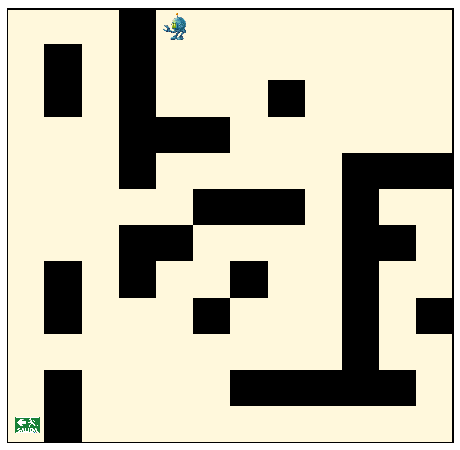

KeyError: (True, False, True, False)

In [8]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.tabla = tabla

for i in range(20):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar() # <= ver definición en agentes.py
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25)   

El error `KeyError: (True, False, True, False)` ocurre porque la tabla no tiene ninguna fila para el percepto `(True, False, True, False)` y entonces no puede determinar ninguna acción a tomar. ¡Observe que el agente no sabe qué acción tomar en ninguna situación cuando haya un muro enfrente! 

**Ejercicio 1:**

El agente llega hasta que se topa con un muro y no sabe qué hacer. Extienda la tabla anterior para incluir las líneas que determinan que "si el frente y el flanco derecho están bloqueados y el flanco izquierdo no está bloqueado, voltear a la izquierda".

Visualice el funcionamiento del agente para comprobar su respuesta.

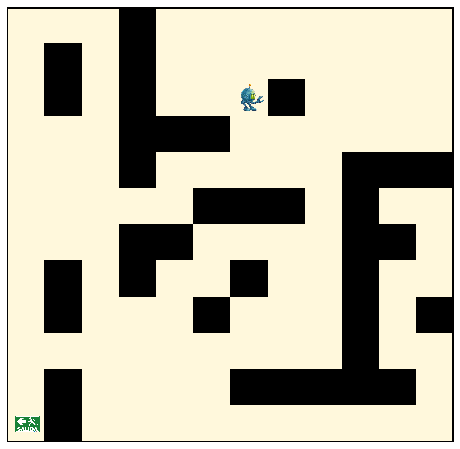

KeyError: (True, False, False, False)

In [29]:
# función que ejecuta el movimiento del agente en el laberinto
def random_walk(pos): 
    lab = Laberinto(pos_inicial = pos)
    agente = Agente()
    agente.tabla = tabla

    for i in range(20):
        agente.perceptos = lab.para_sentidos()
        a = agente.reaccionar() # <= ver definición en agentes.py
        lab.transicion(a)
        clear_output(wait=True)
        lab.pintar()
        plt.show()
        sleep(.25)   


# correccion de la tabla ejercicio 1
tabla = {
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],

    # si el frente y el flanco derecho están bloqueados y 
    # el flanco izquierdo no está bloqueado, voltear a la izquierda
    # (frontal, izquierdo, derecho, trasero)
    (True, False, True, False):['voltearIzquierda']
}

random_walk((11,11))

---

**Ejercicio 2:**

En la tabla falta incluir instrucciones que digan que "si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla". Extienda la tabla del ejercicio 1 para incluir las líneas que implementen esta regla. Visualice el funcionamiento del agente comenzando desde la casilla $(11,11)$.

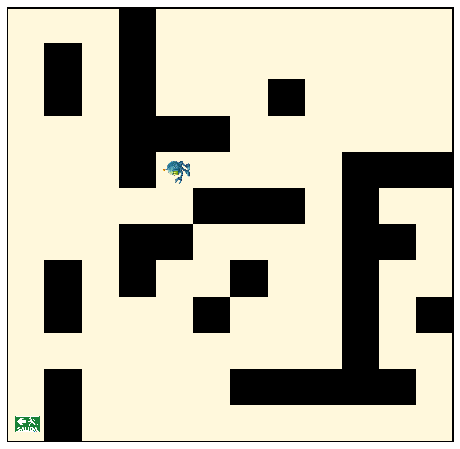

In [32]:
# correccion de la tabla ejercicio 2
tabla = {
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    (True, False, True, False):['voltearIzquierda'], 
    
    # si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla
    (True, False, False, False):['voltearDerecha'],
    (False, True, False, False):['adelante'],
}

random_walk((11,11))


---

**Ejercicio 3:**

* ¿Qué pasa cuando el agente comienza en la casilla $(6,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

* ¿Qué pasa cuando el agente comienza en la casilla $(7,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

> ¿Qué pasa cuando el agente comienza en la casilla $(6,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

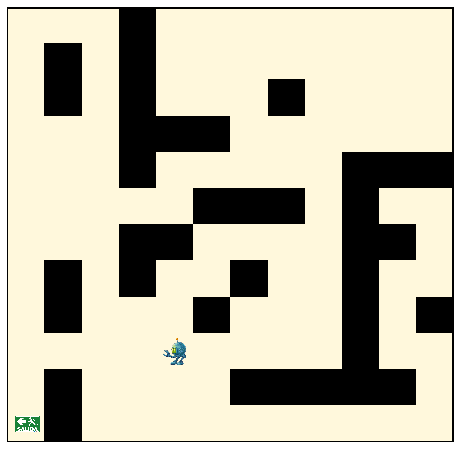

KeyError: (False, False, False, False)

In [35]:
random_walk((6,3))

Se observa que el agente no sabe como actuar cuando no se encuentra expuesto a ningún muro. Esto es, no tiene una instrucción dada cuando todos sus sensores marcan `False`.

> ¿Qué pasa cuando el agente comienza en la casilla $(7,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

In [36]:
random_walk((7,3))

KeyError: (False, False, False, False)

Cuando el recorrido del agente comienza en la posición `(7,3)`, ocurre una situación similar a la expresada en el literal anterior: todos los sensores del agente marca `False` debido a que no está expuesto a ningún muro. En esta situación, el programa ni siquiera inicia. 

Añadiendo una regla adicional que le permita al agente avanzar hacia el frente cuando no todos sus sensores marquen `False`, se obtiene la siguiente tabla:

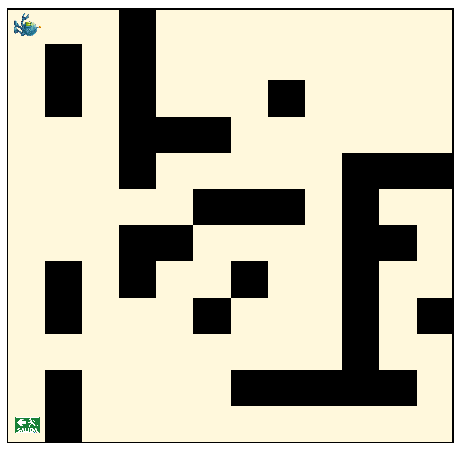

In [37]:
# correccion de la tabla ejercicio 3
tabla = {
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    (True, False, True, False):['voltearIzquierda'], 
    (True, False, False, False):['voltearDerecha'],
    (False, True, False, False):['adelante'],

    # si todos los sensores marcan Falase, avanzar una casilla hacia adelante
    (False, False, False, False):['adelante'],

}

random_walk((7,3))


---

## Un agente de reflejo simple <a class="anchor" id="agenteSR"></a>

([Volver al inicio](#inicio))

El proceso de escribir una tabla es bastante dispendioso, pues hay que considerar una gran cantidad de combinaciones de valores para los sensores. Un tipo de agente de nivel un poco más elevado que resuelve esta situación son los agentes de reflejo simple. El programa de este tipo de agentes está basado en relgas de condición-acción, las cuales relacionan condiciones sobre los sensores y las acciones. Al considerar condiciones en lugar de combinaciones de valores, la escritura es más eficiente.

A continuación presentamos una posible implementación de un agente de reflejo simple para el problema del laberinto.

In [38]:
# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
}

In [39]:
def programaSR(self):
    reaccion = self.reglas
    for antecedente in self.reglas:
        if eval(antecedente):
            self.acciones += reaccion[antecedente]
            break

setattr(Agente, 'programa', programaSR)

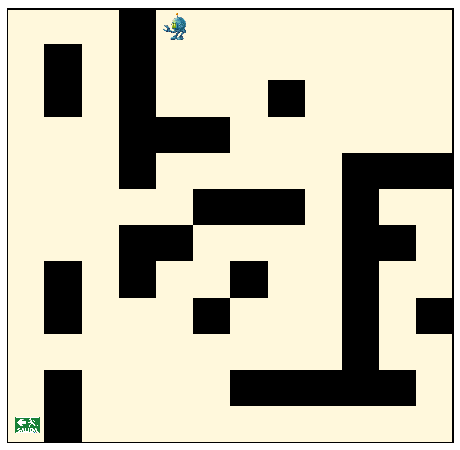

IndexError: pop from empty list

In [40]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.reglas = reglas

for i in range(50):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

El error `IndexError: pop from empty list` ocurre porque la lista de acciones es vacía, toda vez que el programa aún no está equipado para dar una decisión cuando hay un muro enfrente.

**Ejercicio 4:**

Extienda el programa de agente anterior para implementar las reglas condición-acción siguientes:

* Si el frente y el flanco derecho están bloqueados pero el flanco izquierdo no está bloqueado, voltear a la izquierda.
* Si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla.

Visualice el funcionamiento del agente desde la casilla $(11,11)$.

In [72]:
def random_walk_SR(pos):

    lab = Laberinto(pos_inicial= pos)
    agente = Agente()
    agente.reglas = reglas

    for i in range(150):
        agente.perceptos = lab.para_sentidos()
        a = agente.reaccionar()
        lab.transicion(a)
        clear_output(wait=True)
        lab.pintar()
        plt.show()
        sleep(.01) 


In [ ]:

# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
    
    # Si el frente y el flanco derecho están bloqueados pero el flanco izquierdo no está bloqueado, 
    # voltear a la izquierda.
    'self.perceptos[0] and self.perceptos[2] and not self.perceptos[1] ': ['voltearIzquierda'],

    # Si el flanco derecho no está bloqueado, 
    # voltear a la derecha y avanzar una casilla
    'not self.perceptos[2]': ['voltearDerecha', 'adelante']
}

random_walk_SR((11,11))

---

**Ejercicio 5:**

¿Cree usted que es posible implementar un agente de respuesta simple para encontrar una salida al comenzar en las casillas $(6,3)$ y $(7,3)$? Justifique su respuesta.

> Es posible, modificando la lista de reglas. Se observa que el orden de las reglas afecta el rendimiento del agente. 

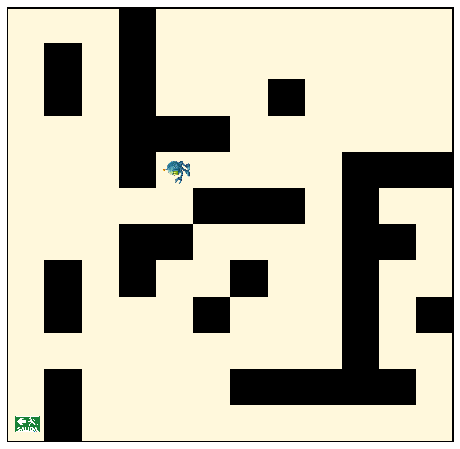

In [73]:
# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
    'self.perceptos[0] and self.perceptos[2] and not self.perceptos[1] ': ['voltearIzquierda'],
    # --- nueva regla:
    # si no hay sensor activado, avanza una casilla
    'not self.perceptos[0] and not self.perceptos[1] and not self.perceptos[2] and not self.perceptos[3]': ['adelante'], 
    'self.perceptos[0] and self.perceptos[1] and self.perceptos[2]': ['voltearIzquierda'], 
    'not self.perceptos[0] and self.perceptos[1] and self.perceptos[2]': ['voltearIzquierda'], 
    'not self.perceptos[2]  and not self.perceptos[2]': ['voltearDerecha', 'adelante'], 
    # ---
    
}

random_walk_SR((7,3))

---

## Un agente basado en conocimiento <a class="anchor" id="agenteKB"></a>

([Volver al inicio](#inicio))

Vamos a crear un agente basado en conocimiento para resolver el problema del laberinto. Veremos que no es tan sencillo como el de reflejo simple. El programa de agente en este caso no es una conexión directa entre perceptos y acciones, pues en la mitad está un modelo del mundo. El modelo será un conjunto de enunciados lógicos en una base de conocimiento, como vimos en el notebook anterior. 

Son varias las ventajas de este tipo de agente respecto al de respuesta simple. Primero, las proposiciones que definen el modelo no requieren estar conectadas directamente a los perceptos y a las acciones. Esto permite definir nuevas categorías para armar restricciones de mayor nivel de abstracción. Además, es posible tener una memoria para almacenar información que pueda ser utilizada muchos turnos después. Adicionalmente, la base de conocimiento permite hacer razonamientos para obtener nueva información a partir de la información almacenada.

Para definir el programa requerimos:

* Interpretar los perceptos como una fórmula lógica.
* Una base de conocimiento con las reglas que definen la dinámica del agente en el mundo.
* Una manera de hacer consultas en la base de conocimiento para determinar nueva información.
* Un entramado de reglas, como en el programa de reflejo simple, que defina qué va a hacer el agente y cómo usará la información de su base de conocimiento para decidir sus acciones.

Veamos ahora uno a uno los componentes del programa de agente.

### Interpretación de los perceptos

La clase `Agente` ya trae definido un método `interp_percepto()`, el cual interpreta los perceptos como letras proposicionales, con la siguiente representación:

* frn_bloq es verdadero sii el sensor de enfrente del robot detecta un obstáculo.
* izq_bloq es verdadero sii el sensor de la izquierda del robot detecta un obstáculo.
* der_bloq es verdadero sii el sensor de la derecha del robot detecta un obstáculo.
* atr_bloq es verdadero sii el sensor de atrás del robot detecta un obstáculo.

In [120]:
from agentes import *
lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.perceptos = lab.para_sentidos()
agente.interp_percepto()

'-frn_bloq_1Y-izq_bloq_1Yder_bloq_1Yatr_bloq_1'

Observe que cada letra trae un número asociado. Este número es el número del turno:

In [121]:
agente.turno = 3
agente.interp_percepto()

'-frn_bloq_3Y-izq_bloq_3Yder_bloq_3Yatr_bloq_3'

Asociar un turno es indispensable, toda vez que en lógica proposicional los valores de las letras proposionales no cambian nunca, pero el valor de los sensores sí. Por esta razón, la representación correcta de los perceptos es la siguiente:

* frn_bloq_n es verdadero sii el sensor de enfrente del robot detecta un obstáculo en el turno n.
* izq_bloq_n es verdadero sii el sensor de la izquierda del robot no detecta un obstáculo en el turno n.
* der_bloq_n es verdadero sii el sensor de la derecha del robot detecta un obstáculo en el turno n.
* atr_bloq_n es verdadero sii el sensor de atrás del robot detecta un obstáculo en el turno n.

### La base de conocimiento

El modelo define la dinámica del mundo y del agente. En este caso sencillo, dado que el entorno es estático, sólo requerimos la dinámica del agente. Es decir, solo tenemos que representar lo que debe hacer el agente de acuerdo a alguna condición. Estas reglas estarán descritas mediante una fórmula lógica. 

Observe que tenemos una restricción importante aquí, toda vez que nuestras fórmulas solo aceptan un cuerpo conformado por conjunciones de literales y una cabeza con un solo literal. La fórmula que representa la regla "Si el frente no está bloqueado y el flanco derecho está bloqueado, avanzar una casilla" es la siguiente:

In [122]:
def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado y el flanco derecho está
        # bloqueado, avanzar una casilla
        f'-frn_bloq_{turno}Yder_bloq_{turno}>adelante_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)

agente = Agente()
agente.conocimiento()

['-frn_bloq_1Yder_bloq_1>adelante_1']

**Nota:** Observe que las letras proposicionales que representan acciones también están indexadas por el turno.

Implementamos ahora la fórmula para las reglas

* "Si el frente no está bloqueado y el flanco derecho está bloqueado, avanzar una casilla"
* "Si el frente y el flanco derecho están bloqueados y el flanco izquierdo no está bloqueado, voltear a la izquierda"
* "Si el flanco derecho no está bloqueado, voltear a la derecha"

In [149]:
def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado y el flanco derecho está
        # bloqueado, avanzar una casilla
        f'-frn_bloq_{turno}Yder_bloq_{turno}>adelante_{turno}',
        # Si el frente y el flanco derecho están bloqueados y 
        # el flanco izquierdo no está bloqueado, voltear a la izquierda
        f'frn_bloq_{turno}Yder_bloq_{turno}Y-izq_bloq_{turno}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado, voltear a la derecha 
        # y avanzar una casilla
        f'-der_bloq_{turno}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)

agente = Agente()
agente.conocimiento()

['-frn_bloq_1Yder_bloq_1>adelante_1',
 'frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1',
 '-der_bloq_1>voltearDerecha_1']

### Consultas

La manera de usar la base de conocimiento es mediante consultas. El resultado de una consulta es `True` o `False`. Una consulta se hace con un objetivo, el cual requiere un literal y la condición de si este se deduce o no a partir de la información en la base de conocimiento. El siguiente es el pseudocódigo que define la función `ASK`, mediante la cual haremos consultas a la base:

<img src="./imagenes/ask.png" width="400"/>

Por ejemplo, un objetivo puede ser saber si al deducir `frn_libre_1` a partir de la base de conocimiento, mediante el algoritmo `backward_chaining`, da como resultado `success`. Si sí, la consulta retorna `True`. 

El otro tipo de objetivo sería saber si el resultado es `failure`. Si `frn_libre_1` no se puede deducir y da como resultado `failure`, entonces el resultado de la consulta es `True`.

Observe que la función `ASK` ya está implementada en la librería `Logica`.

Veámos las consultas que haremos para nuestro caso particular. En primer lugar, definimos la base de conocimiento:

In [111]:
from logica import *
from agentes import *
lab = Laberinto()
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con
agente.perceptos = lab.para_sentidos()
agente.base.TELL(agente.interp_percepto())
print(agente.base)

Datos:
-frn_bloq_1
-izq_bloq_1
der_bloq_1
atr_bloq_1

Reglas:
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1



Ahora preguntamos si la acción que debemos hacer es voltear a la derecha:

In [104]:
objetivo = 'voltearDerecha_'+str(agente.turno)
ASK(objetivo, 'success', agente.base)

False

Luego, preguntaremos si debemos seguir adelante:

In [105]:
objetivo = 'adelante_'+str(agente.turno)
ASK(objetivo, 'success', agente.base)

True

Finalmente, si la anterior consulta no hubiera funcionado, seguiríamos con la consulta de si debemos voltear a la izquierda:

In [106]:
objetivo = 'voltearIzquierda_'+str(agente.turno)
ASK(objetivo, 'success', agente.base)

False

### Definición del programa de agente

Ya podemos poner todos los elementos juntos en un programa de agente y ver su funcionamiento en el laberinto.

In [112]:
def programaKB(self):
    turno = self.turno
    if ASK(f'voltearDerecha_{turno}', 'success', self.base):
        self.acciones.append('voltearDerecha')
        self.base.TELL(f'voltearDerecha_{turno}')
    elif ASK(f'adelante_{turno}', 'success', self.base):
        self.acciones.append('adelante')
        self.base.TELL(f'adelante_{turno}')
    elif ASK(f'voltearIzquierda_{turno}', 'success', self.base):
        self.acciones.append('voltearIzquierda')
        self.base.TELL(f'voltearIzquierda_{turno}')
    else:
        raise Exception('¡Caso no considerado!')
setattr(Agente, 'programa', programaKB)

Estudiemos las primeras tres rondas y lo que pasa con la base de conocimiento:

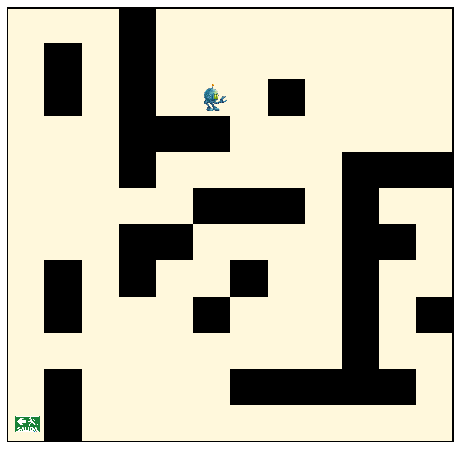

------- Turno 1 -------
Datos:
-frn_bloq_1
-izq_bloq_1
der_bloq_1
-atr_bloq_1

Reglas:
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1

voltearDerecha? False
adelante? True
voltearIzquierda? False


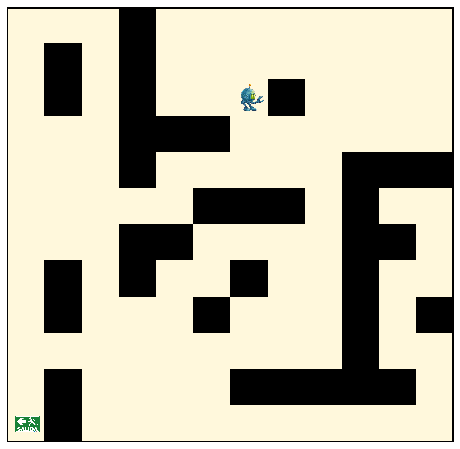

------- Turno 2 -------
Datos:
-frn_bloq_1
-izq_bloq_1
der_bloq_1
-atr_bloq_1
adelante_1
frn_bloq_2
-izq_bloq_2
-der_bloq_2
-atr_bloq_2

Reglas:
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1
-frn_bloq_2Yder_bloq_2>adelante_2
frn_bloq_2Yder_bloq_2Y-izq_bloq_2>voltearIzquierda_2
-der_bloq_2>voltearDerecha_2

voltearDerecha? True
adelante? False
voltearIzquierda? False


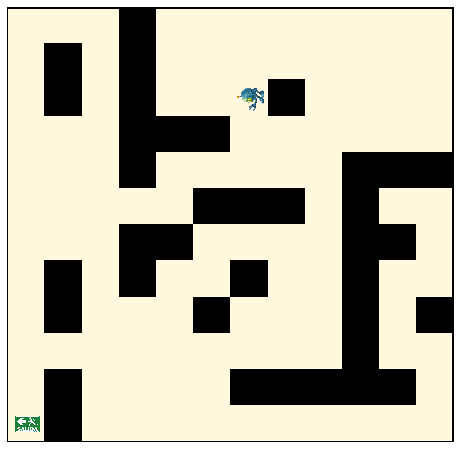

------- Turno 3 -------
Datos:
-frn_bloq_1
-izq_bloq_1
der_bloq_1
-atr_bloq_1
adelante_1
frn_bloq_2
-izq_bloq_2
-der_bloq_2
-atr_bloq_2
voltearDerecha_2
-frn_bloq_3
izq_bloq_3
-der_bloq_3
-atr_bloq_3

Reglas:
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1
-frn_bloq_1Yder_bloq_1>adelante_1
frn_bloq_1Yder_bloq_1Y-izq_bloq_1>voltearIzquierda_1
-der_bloq_1>voltearDerecha_1
-frn_bloq_2Yder_bloq_2>adelante_2
frn_bloq_2Yder_bloq_2Y-izq_bloq_2>voltearIzquierda_2
-der_bloq_2>voltearDerecha_2
-frn_bloq_3Yder_bloq_3>adelante_3
frn_bloq_3Yder_bloq_3Y-izq_bloq_3>voltearIzquierda_3
-der_bloq_3>voltearDerecha_3

voltearDerecha? True
adelante? False
voltearIzquierda? False


In [113]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(5,9), dir_agente='este')
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con

for i in range(3):
    lab.pintar()
    agente.perceptos = lab.para_sentidos()
    agente.base.TELL(agente.interp_percepto())
    for f in agente.conocimiento():
        agente.base.TELL(f)
    print(f'------- Turno {i+1} -------')
    print(agente.base)
    print('voltearDerecha?', ASK('voltearDerecha_'+str(agente.turno), 'success', agente.base))
    print('adelante?', ASK('adelante_'+str(agente.turno), 'success', agente.base))
    print('voltearIzquierda?', ASK('voltearIzquierda_'+str(agente.turno), 'success', agente.base))
    a = agente.reaccionar()
    lab.transicion(a)


Para finalizar, pongamos a andar al agente por el laberinto desde la casilla $(11,11)$:

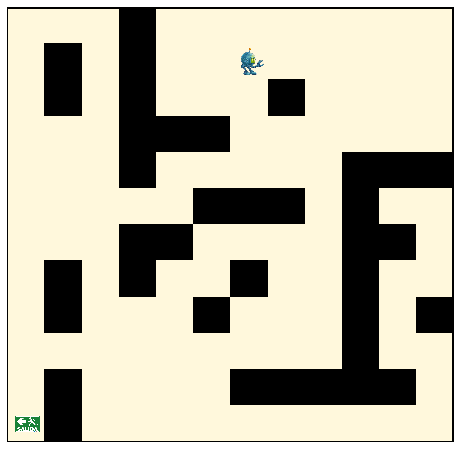

In [128]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con

for i in range(30):
    agente.perceptos = lab.para_sentidos()
    agente.base.TELL(agente.interp_percepto())
    for f in agente.conocimiento():
        agente.base.TELL(f)
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.05) 


**Ejercicio 6:**

Para arreglar el funcionamiento del agente necesitamos hacer lo siguiente:

* Modifique la primera regla en la base de conocimiento para que diga "Si el frente no está bloqueado, avanzar una casilla".
* Modifique la segunda regla en la base de conocimiento para que diga "Si el frente está bloqueado y la izquierda no, avanzar una casilla".
* Modifique la tercera regla en la base de conocimiento para que diga que "Si el flanco derecho no está bloqueado pero estaba bloqueado el turno pasado, voltear a la derecha".


Corra de nuevo el programa de agente desde la casilla $(11,11)$ para verificar el funcionamiento.

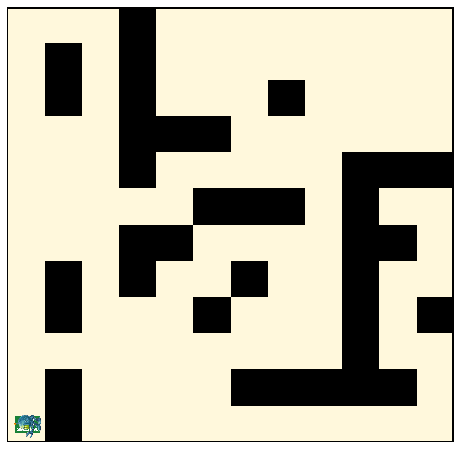

Exception: ¡Caso no considerado!

In [162]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado, avanzar una casilla
        f'-frn_bloq_{turno}>adelante_{turno}',
        # Si el frente está bloqueado y la izquierda no, voltear a la izquierda
        f'frn_bloq_{turno}Y-izq_bloq_{turno}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado pero estaba bloqueado el turno pasado, voltear a la derecha
        f'-der_bloq_{turno}Yder_bloq_{turno-1}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)
lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con


for i in range(50):
    agente.perceptos = lab.para_sentidos()
    agente.base.TELL(agente.interp_percepto())
    for f in agente.conocimiento():
        agente.base.TELL(f)
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.05) 

---

**Ejercicio 7:**

¿Desde cuáles de las siguientes casillas el programa que hemos escrito soluciona el laberinto?

* $(6,3)$
* $(11,2)$

Ninguno de los dos. En ambos casos, cuando el agente no no tiene muros al rededor no encuentra instrucción y si queda dando vueltas. Por esto, se debe incluir una regla en la base de conocimiento que le indique como proceder. 

> Caso `(6,3)` 
No se soluciona, puesto que las reglas definidas no permiten que el agente tome una decisión al enfrentarse al caso específico cuando no tiene muros al rededor. En este caso, gira a la derecha pero lo hace debido a la regla 3. 

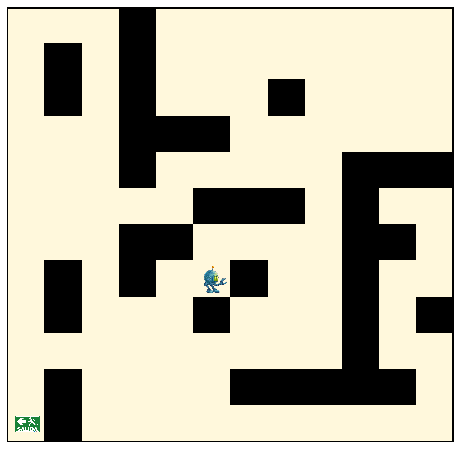

In [164]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado, avanzar una casilla
        f'-frn_bloq_{turno}>adelante_{turno}',
        # Si el frente está bloqueado y la izquierda no, voltear a la izquierda
        f'frn_bloq_{turno}Y-izq_bloq_{turno}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado pero estaba bloqueado el turno pasado, voltear a la derecha
        f'-der_bloq_{turno}Yder_bloq_{turno-1}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)
lab = Laberinto(pos_inicial=(6,3))
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con


for i in range(30):
    agente.perceptos = lab.para_sentidos()
    agente.base.TELL(agente.interp_percepto())
    for f in agente.conocimiento():
        agente.base.TELL(f)
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.05) 

> caso `(11, 2)` No se soluciona, puesto que no existe regla definida para el agente cuando se encuentra sin salida. Esto es, cuando tiene muro al frente, izquierda y derecha. 

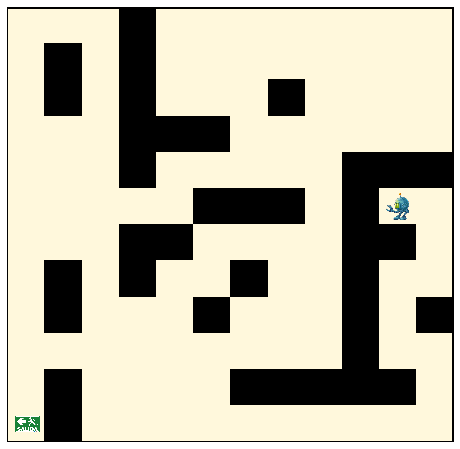

Exception: ¡Caso no considerado!

In [165]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado, avanzar una casilla
        f'-frn_bloq_{turno}>adelante_{turno}',
        # Si el frente está bloqueado y la izquierda no, voltear a la izquierda
        f'frn_bloq_{turno}Y-izq_bloq_{turno}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado pero estaba bloqueado el turno pasado, voltear a la derecha
        f'-der_bloq_{turno}Yder_bloq_{turno-1}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)
lab = Laberinto(pos_inicial=(11,2))
agente = Agente()
formulas = agente.conocimiento()
base_con = LPQuery(formulas)
agente.base = base_con


for i in range(30):
    agente.perceptos = lab.para_sentidos()
    agente.base.TELL(agente.interp_percepto())
    for f in agente.conocimiento():
        agente.base.TELL(f)
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.05) 

---

## Creando un mapa mental<a class="anchor" id="mapa"></a>

([Volver al inicio](#inicio))

El programa de agente basado en conocimiento que hemos escrito permite solucionar el problema desde varias casillas, pero no desde $(3,3)$. Para solucionar el problema del laberinto debemos considerar qué casillas visitamos y cuáles no. Esto es, necesitamos ir creando una especie de mapa mental. Este mapa irá quedando grabado en una serie de letras proposicionales que representan la casilla en que está el agente. Para lograr esto, desarrollaremos la base de conocimiento de la siguiente manera. Primero necesitamos una letra proposicional que represente la posición actual del agente:

* en(x,y)_t es verdadero sii el agente está en la casilla $(x,y)$ en el turno $t$.

Para controlar la posición del agente, es necesario usar la información de qué acción realiza y en qué dirección está mirando. Entonces necesitamos cuatro letras proposicionales que representen las cuatro direcciones cardinales:

* midando_o_t es verdadero sii el agente está mirando al oeste en el turno $t$.
* midando_e_t es verdadero sii el agente está mirando al este en el turno $t$.
* midando_s_t es verdadero sii el agente está mirando al sur en el turno $t$.
* midando_n_t es verdadero sii el agente está mirando al norte en el turno $t$.

### Posición del agente (fluente_en)
La posición del agente de un turno a otro está dada por las siguientes regas:

* en($x$,$y$)$_t$ $\wedge$ mirando_o$_t$ $\wedge$ adelante$_t$ $\to$ en($x-1$,$y$)$_{t+1}$
* en($x$,$y$)$_t$ $\wedge$ mirando_e$_t$ $\wedge$ adelante$_t$ $\to$ en($x+1$,$y$)$_{t+1}$
* en($x$,$y$)$_t$ $\wedge$ mirando_s$_t$ $\wedge$ adelante$_t$ $\to$ en($x$,$y-1$)$_{t+1}$
* en($x$,$y$)$_t$ $\wedge$ mirando_n$_t$ $\wedge$ adelante$_t$ $\to$ en($x$,$y+1$)$_{t+1}$
* en($x$,$y$)$_t$ $\wedge$ voltearIzquierda $\to$ en($x$,$y$)$_t$
* en($x$,$y$)$_t$ $\wedge$ voltearDerecha $\to$ en($x$,$y$)$_t$

In [166]:
def fluente_en(self):
    turno = agente.turno
    x, y = agente.loc
    formulas = [
        f'en({x},{y})_{turno}Ymirando_o_{turno}Yadelante_{turno}>en({x-1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_e_{turno}Yadelante_{turno}>en({x+1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_s_{turno}Yadelante_{turno}>en({x},{y-1})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_n_{turno}Yadelante_{turno}>en({x},{y+1})_{turno+1}',
        f'en({x},{y})_{turno}YvoltearIzquierda_{turno}>en({x},{y})_{turno+1}',
        f'en({x},{y})_{turno}YvoltearDerecha_{turno}>en({x},{y})_{turno+1}',
    ]
    return formulas

setattr(Agente, 'fluente_en', fluente_en)

agente = Agente()
agente.fluente_en()

['en(0,0)_1Ymirando_o_1Yadelante_1>en(-1,0)_2',
 'en(0,0)_1Ymirando_e_1Yadelante_1>en(1,0)_2',
 'en(0,0)_1Ymirando_s_1Yadelante_1>en(0,-1)_2',
 'en(0,0)_1Ymirando_n_1Yadelante_1>en(0,1)_2',
 'en(0,0)_1YvoltearIzquierda_1>en(0,0)_2',
 'en(0,0)_1YvoltearDerecha_1>en(0,0)_2']

### Dirección en que mira (fluente_mirando)

Veamos ahora las reglas que determinan el comportamiento de la dirección del agente. Las primeras dicen que la acción de avanzar una casilla no cambia la dirección:

* mirando_o$_t$ $\wedge$ adelante$_t$ $\to$ mirando_o$_{t+1}$
* mirando_s$_t$ $\wedge$ adelante$_t$ $\to$ mirando_s$_{t+1}$
* mirando_e$_t$ $\wedge$ adelante$_t$ $\to$ mirando_e$_{t+1}$
* mirando_n$_t$ $\wedge$ adelante$_t$ $\to$ mirando_n$_{t+1}$


In [167]:
def fluente_mirando(turno):
    turno = agente.turno
    formulas = [
        f'mirando_o_{turno}Yadelante_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yadelante_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yadelante_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yadelante_{turno}>mirando_n_{turno+1}',
    ]
    return formulas

setattr(Agente, 'fluente_mirando', fluente_mirando)

agente = Agente()
agente.fluente_mirando()

['mirando_o_1Yadelante_1>mirando_o_2',
 'mirando_s_1Yadelante_1>mirando_s_2',
 'mirando_e_1Yadelante_1>mirando_e_2',
 'mirando_n_1Yadelante_1>mirando_n_2']

También tenemos las siguientes reglas, que controlan el cambio de dirección con la acción de voltear 90º a la izquierda:

* mirando_o$_t$ $\wedge$ voltearIzquierda$_t$ $\to$ mirando_s$_{t+1}$
* mirando_s$_t$ $\wedge$ voltearIzquierda$_t$ $\to$ mirando_e$_{t+1}$
* mirando_e$_t$ $\wedge$ voltearIzquierda$_t$ $\to$ mirando_n$_{t+1}$
* mirando_n$_t$ $\wedge$ voltearIzquierda$_t$ $\to$ mirando_o$_{t+1}$

Y lo mismo con la acción de voltear a la derecha:

* mirando_o$_t$ $\wedge$ voltearDerecha$_t$ $\to$ mirando_n$_{t+1}$
* mirando_n$_t$ $\wedge$ voltearDerecha$_t$ $\to$ mirando_e$_{t+1}$
* mirando_e$_t$ $\wedge$ voltearDerecha$_t$ $\to$ mirando_s$_{t+1}$
* mirando_s$_t$ $\wedge$ voltearDerecha$_t$ $\to$ mirando_o$_{t+1}$

**Ejercicio 8:**

Implemente los dos últimos tipos de reglas para el fuente $mirando$.

In [168]:
def fluente_mirando(turno):
    turno = agente.turno
    formulas = [
        f'mirando_o_{turno}Yadelante_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yadelante_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yadelante_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yadelante_{turno}>mirando_n_{turno+1}',

        f'mirando_o_{turno}voltearIzquierda{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}voltearIzquierda{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}voltearIzquierda{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}voltearIzquierda{turno}>mirando_o_{turno+1}',

        f'mirando_o_{turno}voltearDerecha{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}voltearDerecha{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}voltearDerecha{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}voltearDerecha{turno}>mirando_o_{turno+1}',
        
    ]
    return formulas

setattr(Agente, 'fluente_mirando', fluente_mirando)

agente = Agente()
agente.fluente_mirando()

['mirando_o_1Yadelante_1>mirando_o_2',
 'mirando_s_1Yadelante_1>mirando_s_2',
 'mirando_e_1Yadelante_1>mirando_e_2',
 'mirando_n_1Yadelante_1>mirando_n_2',
 'mirando_o_1voltearIzquierda1>mirando_s_2',
 'mirando_s_1voltearIzquierda1>mirando_e_2',
 'mirando_e_1voltearIzquierda1>mirando_n_2',
 'mirando_n_1voltearIzquierda1>mirando_o_2',
 'mirando_o_1voltearDerecha1>mirando_n_2',
 'mirando_n_1voltearDerecha1>mirando_e_2',
 'mirando_e_1voltearDerecha1>mirando_s_2',
 'mirando_s_1voltearDerecha1>mirando_o_2']

---

### Casillas visitadas (fluente_visitadas)

Ahora ya podemos incluir letras proposicionales que determinen que una casilla ha sido visitada:

* visitada(x,y)_t es verdadera sii el agente ha visitado la casilla $(x,y)$ en el turno $t$.

Las reglas son las siguientes:

* en(x,y)$_t$ $\to$ visitada(x,y)$_t$
* visitada(x,y)$_t$ $\to$ visitada(x,y)$_{t+1}$

In [169]:
def fluente_visitadas(self):
    turno = self.turno
    casillas = [(x,y) for x in range(12) for y in range(12)]
    formulas = []
    for c in casillas:
        x, y = c
        formulas += [
            f'en({x},{y})_{turno}>visitada({x},{y})_{turno}',                
            f'visitada({x},{y})_{turno}>visitada({x},{y})_{turno+1}',                
        ]
    return formulas

setattr(Agente, 'fluente_visitadas', fluente_visitadas)

agente = Agente()
agente.fluente_visitadas()

['en(0,0)_1>visitada(0,0)_1',
 'visitada(0,0)_1>visitada(0,0)_2',
 'en(0,1)_1>visitada(0,1)_1',
 'visitada(0,1)_1>visitada(0,1)_2',
 'en(0,2)_1>visitada(0,2)_1',
 'visitada(0,2)_1>visitada(0,2)_2',
 'en(0,3)_1>visitada(0,3)_1',
 'visitada(0,3)_1>visitada(0,3)_2',
 'en(0,4)_1>visitada(0,4)_1',
 'visitada(0,4)_1>visitada(0,4)_2',
 'en(0,5)_1>visitada(0,5)_1',
 'visitada(0,5)_1>visitada(0,5)_2',
 'en(0,6)_1>visitada(0,6)_1',
 'visitada(0,6)_1>visitada(0,6)_2',
 'en(0,7)_1>visitada(0,7)_1',
 'visitada(0,7)_1>visitada(0,7)_2',
 'en(0,8)_1>visitada(0,8)_1',
 'visitada(0,8)_1>visitada(0,8)_2',
 'en(0,9)_1>visitada(0,9)_1',
 'visitada(0,9)_1>visitada(0,9)_2',
 'en(0,10)_1>visitada(0,10)_1',
 'visitada(0,10)_1>visitada(0,10)_2',
 'en(0,11)_1>visitada(0,11)_1',
 'visitada(0,11)_1>visitada(0,11)_2',
 'en(1,0)_1>visitada(1,0)_1',
 'visitada(1,0)_1>visitada(1,0)_2',
 'en(1,1)_1>visitada(1,1)_1',
 'visitada(1,1)_1>visitada(1,1)_2',
 'en(1,2)_1>visitada(1,2)_1',
 'visitada(1,2)_1>visitada(1,2)_2',
 '

### Incompatibilidad de reglas

Observe que las reglas 1 y 3 de la base de conocimiento 

$\neg$frn_bloq$_t$ $\to$ adelante$_t$

y 

$\neg$der_bloq$_t$ $\wedge$ der_bloq$_{t-1}$ $\to$ voltearDerecha$_t$

producen acciones contradictorias en una situación en la cual la fórmula

$\neg$frn_bloq$_t$ $\wedge$ $\neg$der_bloq$_t$ $\wedge$ der_bloq$_{t-1}$

sea verdadera.

El programa de agente `programaKB` está diseñado para primero verificar si el agente voltea a la derecha. En caso afirmativo, no verifica más opciones. No obstante, **la base de conocimiento permite derivar las dos acciones**.

Es necesario arreglar esta situación, de tal manera que una y solo una regla sea aplicable en cada situación. Esto se logra modificando la primera regla, de tal manera que se cumpla en los casos en que no se cumple la tercera. Esto se logra mediante la fórmula:

$\neg$frn_bloq$_t$ $\wedge$ (der_bloq$_t$ $\vee$ $\neg$der_bloq$_{t-1}$) $\to$ adelante$_t$

Como esta regla transgrede la restricción que hemos hecho sobre las reglas, debemos modificarla. El mismo efecto se logra usando dos reglas así:

* $\neg$frn_bloq$_t$ $\wedge$ der_bloq$_t$ $\to$ adelante$_t$
* $\neg$frn_bloq$_t$ $\wedge$ $\neg$der_bloq$_t$ $\wedge$ $\neg$der_bloq$_{t-1}$ $\to$ adelante$_t$

Es necesario hacer lo mismo con la segunda regla. 

In [170]:
def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente no está bloqueado Y
        #    -  la derecha está bloqueada O
        #    -  la derecha no esta bloqueada ahora ni en el turno pasado,
        # entonces avanzar una casilla
        f'-frn_bloq_{turno}Yder_bloq_{turno}>adelante_{turno}',
        f'-frn_bloq_{turno}Y-der_bloq_{turno}Y-der_bloq_{turno-1}>adelante_{turno}',
        # Si el frente está bloqueado y la izquierda no Y
        #    -  la derecha está bloqueada O
        #    -  la derecha no esta bloqueada ahora ni en el turno pasado, 
        # entonces voltear a la izquierda
        f'frn_bloq_{turno}Y-izq_bloq_{turno}Yder_bloq_{turno}>voltearIzquierda_{turno}',
        f'frn_bloq_{turno}Y-izq_bloq_{turno}Y-der_bloq_{turno}Y-der_bloq_{turno-1}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado pero estaba
        # bloqueado el turno pasado, voltear a la derecha 
        f'-der_bloq_{turno}Yder_bloq_{turno-1}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)

agente = Agente()
agente.conocimiento()

['-frn_bloq_1Yder_bloq_1>adelante_1',
 '-frn_bloq_1Y-der_bloq_1Y-der_bloq_0>adelante_1',
 'frn_bloq_1Y-izq_bloq_1Yder_bloq_1>voltearIzquierda_1',
 'frn_bloq_1Y-izq_bloq_1Y-der_bloq_1Y-der_bloq_0>voltearIzquierda_1',
 '-der_bloq_1Yder_bloq_0>voltearDerecha_1']

### Estimación de estados

La base de conocimiento crece cada turno, puesto que vamos incluyendo cada vez más y más reglas y datos en ella. Esto genera, evidentemente, que las consultas sean cada vez más demoradas. Para solucionar este inconveniente, debemos mantener un tamaño relativamente constante de la base de conocimiento. Esto lo logramos mediante una estimación de estado, que consiste en solo guardar la información relevante en memoria del estado actual.

In [208]:
def posicion_inicial(self):
    x, y = self.loc
    formulas = ['mirando_o_1', 
                f'en({x},{y})_1',
                '-frn_visitada_1',
                '-frn_bloq_0',
                '-izq_bloq_0',
                '-der_bloq_0',
                '-atr_bloq_0',
               ]
    return formulas

setattr(Agente,'posicion_inicial',posicion_inicial)

def estimar_estado(self):
    turno = self.turno
    formulas = []
    formulas += self.conocimiento()
    formulas += self.fluente_en()
    formulas += self.fluente_mirando()
    formulas += self.fluente_visitadas()
    formulas += self.fluente_frn_visitada()
    formulas += [self.nueva_posicion()]
    formulas += [self.nueva_direccion()]
    formulas += self.cache()
    agente.perceptos = lab.para_sentidos()
    formulas += [agente.interp_percepto()]
    self.base = LPQuery(formulas)
  
setattr(Agente,'estimar_estado',estimar_estado)

def cache(self):
    turno = self.turno
    # Guardamos los perceptos del turno pasado
    aux = [x for x in self.base.datos if f'_bloq_{turno-1}' in x]
    # Guardamos las casillas visitadas
    visitadas = []
    casillas = [(x,y) for x in range(12) for y in range(12)]
    for c in casillas:
        x, y = c
        consulta = ASK(f'visitada({x},{y})_{turno}', 'success', self.base)
        if consulta:
            visitadas.append(f'visitada({x},{y})_{turno}')
    return aux + visitadas

setattr(Agente,'cache',cache)

def nueva_posicion(self):
    casillas = [self.loc] + adyacentes(self.loc)
    for c in casillas:
        x, y = c
        pos = f'en({x},{y})_{self.turno}'
        evaluacion = ASK(pos, 'success', self.base)
        if evaluacion:
            self.loc = (x,y)
            return pos
    raise Exception('¡No se encontró posición!')

setattr(Agente,'nueva_posicion',nueva_posicion)

def nueva_direccion(self):
    direcciones = ['o', 'e', 's', 'n']
    for d in direcciones:
        #print(d)
        direccion = f'mirando_{d}_{self.turno}'
        evaluacion = ASK(direccion, 'success', self.base)
        if evaluacion:
            return direccion
    raise Exception('¡No se encontró dirección!')
            
setattr(Agente,'nueva_direccion',nueva_direccion)

def adyacentes(c):
    x, y = c
    return [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]


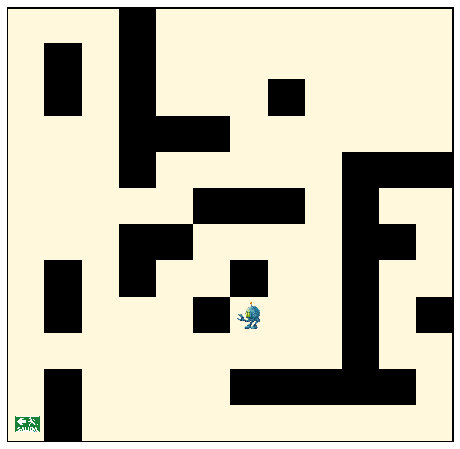

Exception: ¡No se encontró dirección!

In [217]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

inicial = (6,3)
lab = Laberinto(pos_inicial=inicial)
agente = Agente()
agente.loc = inicial
agente.base = LPQuery([])
agente.perceptos = lab.para_sentidos()
agente.base.TELL(agente.interp_percepto())
formulas = []
formulas += agente.posicion_inicial()
formulas += agente.conocimiento()
formulas += agente.fluente_en()
formulas += agente.fluente_mirando()
formulas += agente.fluente_visitadas()
for f in formulas:
    agente.base.TELL(f)

lab.pintar()
plt.show()
sleep(.5) 
    
for i in range(25):
    a = agente.reaccionar()
    lab.transicion(a)
    agente.nueva_direccion()
    agente.nueva_posicion()
    agente.estimar_estado()
    clear_output(wait=True)
    print(vis(agente))
    lab.pintar()
    plt.show()
    sleep(.5) 

In [214]:
formulas

['mirando_o_1',
 'en(11,11)_1',
 '-frn_visitada_1',
 '-frn_bloq_0',
 '-izq_bloq_0',
 '-der_bloq_0',
 '-atr_bloq_0',
 'frn_visitada_1>voltearIzquierda_1',
 '-frn_visitada_1Y-frn_bloq_1Yder_bloq_1>adelante_1',
 '-frn_visitada_1Y-frn_bloq_1Y-der_bloq_1Y-der_bloq_0>adelante_1',
 'frn_bloq_1Y-izq_bloq_1Yder_bloq_1>voltearIzquierda_1',
 'frn_bloq_1Y-izq_bloq_1Y-der_bloq_1Y-der_bloq_0>voltearIzquierda_1',
 '-frn_visitada_1Y-der_bloq_1Yder_bloq_0>voltearDerecha_1',
 'en(11,11)_1Ymirando_o_1Yadelante_1>en(10,11)_2',
 'en(11,11)_1Ymirando_e_1Yadelante_1>en(12,11)_2',
 'en(11,11)_1Ymirando_s_1Yadelante_1>en(11,10)_2',
 'en(11,11)_1Ymirando_n_1Yadelante_1>en(11,12)_2',
 'en(11,11)_1YvoltearIzquierda_1>en(11,11)_2',
 'en(11,11)_1YvoltearDerecha_1>en(11,11)_2',
 'mirando_o_1Yadelante_1>mirando_o_2',
 'mirando_s_1Yadelante_1>mirando_s_2',
 'mirando_e_1Yadelante_1>mirando_e_2',
 'mirando_n_1Yadelante_1>mirando_n_2',
 'mirando_o_1voltearIzquierda1>mirando_s_2',
 'mirando_s_1voltearIzquierda1>mirando_e_

In [216]:
for i in range(25):
    a = agente.reaccionar()
    lab.transicion(a)
    agente.nueva_direccion()
    agente.nueva_posicion()
    agente.estimar_estado()
    clear_output(wait=True)
    print(vis(agente))
    lab.pintar()
    plt.show()
    sleep(.5) 

Exception: ¡Caso no considerado!

### Categorías adicionales (fluente_frn_visitada)

Para ilustrar cómo, mediante la lógica, podemos crear categorías cada vez más abstractas, incluiremos una letra proposicional que representa que la casilla de enfrente del agente, en la posición en que se encuentra y en la dirección en que está mirando, ha sido visitada por el agente en algún turno anterior:

* frn_visitada$_t$ es verdadera sii en el turno $t$ el agente ya ha visitado la casilla enfrente suyo.

Las reglas que controlan esta letra son:

* en(x,y)$_t$ $\wedge$ mirando_o$_t$ $\wedge$ visitada(x-1,y)$_t$ $\to$ frn_visitada$_t$
* en(x,y)$_t$ $\wedge$ mirando_e$_t$ $\wedge$ visitada(x+1,y)$_t$ $\to$ frn_visitada$_t$
* en(x,y)$_t$ $\wedge$ mirando_s$_t$ $\wedge$ visitada(x,y-1)$_t$ $\to$ frn_visitada$_t$
* en(x,y)$_t$ $\wedge$ mirando_n$_t$ $\wedge$ visitada(x,y+1)$_t$ $\to$ frn_visitada$_t$

In [173]:
def fluente_frn_visitada(self):
    turno = self.turno
    x, y = self.loc
    formulas = [
        f'en({x},{y})_{turno}Ymirando_o_{turno}Yvisitada({x-1},{y})_{turno}>frn_visitada_{turno}',        
        f'en({x},{y})_{turno}Ymirando_e_{turno}Yvisitada({x+1},{y})_{turno}>frn_visitada_{turno}',        
        f'en({x},{y})_{turno}Ymirando_s_{turno}Yvisitada({x},{y-1})_{turno}>frn_visitada_{turno}',        
        f'en({x},{y})_{turno}Ymirando_n_{turno}Yvisitada({x},{y+1})_{turno}>frn_visitada_{turno}',        
    ]
    return formulas

setattr(Agente, 'fluente_frn_visitada', fluente_frn_visitada)

agente = Agente()
agente.fluente_frn_visitada()

['en(0,0)_1Ymirando_o_1Yvisitada(-1,0)_1>frn_visitada_1',
 'en(0,0)_1Ymirando_e_1Yvisitada(1,0)_1>frn_visitada_1',
 'en(0,0)_1Ymirando_s_1Yvisitada(0,-1)_1>frn_visitada_1',
 'en(0,0)_1Ymirando_n_1Yvisitada(0,1)_1>frn_visitada_1']

In [174]:
def estimar_estado(self):
    turno = self.turno
    formulas = []
    formulas += self.conocimiento()
    formulas += self.fluente_en()
    formulas += self.fluente_mirando()
    formulas += self.fluente_visitadas()
    formulas += self.fluente_frn_visitada() # <= Incluimos este fluente en la estimación de estado 
    formulas += [self.nueva_posicion()]
    formulas += [self.nueva_direccion()]
    formulas += self.cache()
    agente.perceptos = lab.para_sentidos()
    formulas += [agente.interp_percepto()]
    self.base = LPQuery(formulas)
    # Deducimos si la casilla de enfrente ha sido visitada
    if ASK(f'frn_visitada_{turno}', 'success', self.base):
        self.base.TELL(f'frn_visitada_{turno}')
    else:
        self.base.TELL(f'-frn_visitada_{turno}') # <= Ver nota importante abajo
  
setattr(Agente,'estimar_estado',estimar_estado)

**Nota importante:** Observe que los métodos de deducción que hemos desarrollado son incompletos. Esto quiere decir, en nuestro caso, que es posible que de la base de datos no se deduzca la proposición frn_visitada$_t$ ni su negación $\neg$frn_visitada$_t$. Es por eso que si la consulta con el objetivo frn_visitada$_t$ y `success` es `False`, incluimos a mano la negación, es decir, $\neg$frn_visitada$_t$.

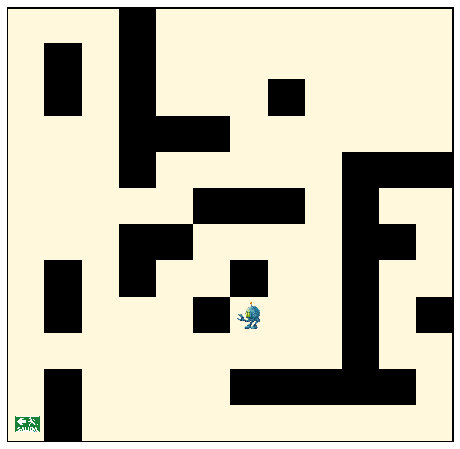

Exception: ¡No se encontró dirección!

In [175]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

inicial = (6,3)
lab = Laberinto(pos_inicial=inicial)
agente = Agente()
agente.loc = inicial
agente.base = LPQuery([])
agente.perceptos = lab.para_sentidos()
agente.base.TELL(agente.interp_percepto())
formulas = []
formulas += agente.posicion_inicial()
formulas += agente.conocimiento()
formulas += agente.fluente_en()
formulas += agente.fluente_mirando()
formulas += agente.fluente_visitadas()
formulas += agente.fluente_frn_visitada()
for f in formulas:
    agente.base.TELL(f)

lab.pintar()
plt.show()
sleep(.5) 
    
for i in range(19):
    a = agente.reaccionar()
    lab.transicion(a)
    agente.nueva_direccion()
    agente.nueva_posicion()
    agente.estimar_estado()
    clear_output(wait=True)
    print(vis(agente))
    lab.pintar()
    plt.show()
    sleep(.15) 

Para tratar de resolver el laberinto desde cada vez más posiciones iniciales, incluimos en las reglas que si el frente ya ha sido visitado, voltee a la derecha:

In [176]:
def conocimiento(self):
    turno = agente.turno
    formulas = [
        # Si el frente ha sido visitado, voltear a la izquierda
        f'frn_visitada_{turno}>voltearIzquierda_{turno}',
        # Si el frente no ha sido visitado y no está bloqueado Y
        #    -  la derecha está bloqueada O
        #    -  la derecha no esta bloqueada ahora ni en el turno pasado
        # entonces, avanzar una casilla
        f'-frn_visitada_{turno}Y-frn_bloq_{turno}Yder_bloq_{turno}>adelante_{turno}',
        f'-frn_visitada_{turno}Y-frn_bloq_{turno}Y-der_bloq_{turno}Y-der_bloq_{turno-1}>adelante_{turno}',
        # Si el frente está bloqueado y la izquierda no Y
        #    -  la derecha está bloqueada O
        #    -  la derecha no esta bloqueada ahora ni en el turno pasado, 
        # entonces avanzar una casilla
        f'frn_bloq_{turno}Y-izq_bloq_{turno}Yder_bloq_{turno}>voltearIzquierda_{turno}',
        f'frn_bloq_{turno}Y-izq_bloq_{turno}Y-der_bloq_{turno}Y-der_bloq_{turno-1}>voltearIzquierda_{turno}',
        # Si el flanco derecho no está bloqueado pero estaba
        # bloqueado el turno pasado, voltear a la derecha 
        f'-frn_visitada_{turno}Y-der_bloq_{turno}Yder_bloq_{turno-1}>voltearDerecha_{turno}',
    ]
    return formulas

setattr(Agente, 'conocimiento', conocimiento)

agente = Agente()
agente.conocimiento()

['frn_visitada_1>voltearIzquierda_1',
 '-frn_visitada_1Y-frn_bloq_1Yder_bloq_1>adelante_1',
 '-frn_visitada_1Y-frn_bloq_1Y-der_bloq_1Y-der_bloq_0>adelante_1',
 'frn_bloq_1Y-izq_bloq_1Yder_bloq_1>voltearIzquierda_1',
 'frn_bloq_1Y-izq_bloq_1Y-der_bloq_1Y-der_bloq_0>voltearIzquierda_1',
 '-frn_visitada_1Y-der_bloq_1Yder_bloq_0>voltearDerecha_1']

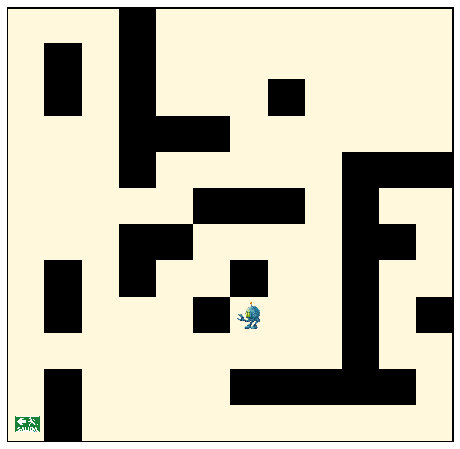

Exception: ¡No se encontró dirección!

In [177]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

inicial = (6,3)
lab = Laberinto(pos_inicial=inicial)
agente = Agente()
agente.loc = inicial
agente.base = LPQuery([])
agente.perceptos = lab.para_sentidos()
agente.base.TELL(agente.interp_percepto())
formulas = []
formulas += agente.posicion_inicial()
formulas += agente.conocimiento()
formulas += agente.fluente_en()
formulas += agente.fluente_mirando()
formulas += agente.fluente_visitadas()
formulas += agente.fluente_frn_visitada()
for f in formulas:
    agente.base.TELL(f)

lab.pintar()
plt.show()
sleep(.5) 
    
for i in range(90):
    a = agente.reaccionar()
    lab.transicion(a)
    agente.nueva_direccion()
    agente.nueva_posicion()
    agente.estimar_estado()
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(0.5) 

**Ejercicio 9:**

Modifique la base de conocimiento, especialmente el método `conocimiento` para que el agente logre salir desde la casilla $(7,3)$.

---

## En este notebook usted aprendió

* Los detalles de la implementación de un programa de agente dirigido por tablas, de reflejo simple y basado en el conocimiento.
